In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
df_train=pd.read_csv('/kaggle/input/finance-banking-predication/credit_train.csv')
df_test= pd.read_csv('/kaggle/input/finance-banking-predication/credit_test.csv')
data = pd.concat([df_train, df_test], ignore_index=True)

In [6]:
#reorder the columns to make the targeted one the last one
df = data.drop(['Loan Status'], axis=1)
df['Loan Status'] = data['Loan Status']

In [7]:
df

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0,Fully Paid
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,Fully Paid
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,Fully Paid
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0,Fully Paid
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.100000e+05,88865.000000,8.886500e+04,110000.000000,110000.000000,51553.000000,110000.000000,110000.000000,1.100000e+05,1.099980e+05,109774.000000,109989.000000
mean,1.174621e+07,1076.594644,1.377449e+06,18468.526823,18.202485,34.907086,11.124491,0.168055,2.942822e+05,7.541012e+05,0.117614,0.029448
std,3.176716e+07,1475.581902,1.063920e+06,12195.564391,7.015575,21.965315,5.011093,0.484389,3.772773e+05,8.014002e+06,0.351290,0.261054
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.795860e+05,705.000000,8.488440e+05,10211.930000,13.500000,16.000000,8.000000,0.000000,1.121950e+05,2.731575e+05,0.000000,0.000000
50%,3.120260e+05,724.000000,1.173459e+06,16202.440000,16.900000,32.000000,10.000000,0.000000,2.096650e+05,4.673900e+05,0.000000,0.000000
75%,5.239300e+05,741.000000,1.651670e+06,23997.522500,21.700000,51.000000,14.000000,0.000000,3.674838e+05,7.831945e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110867 entries, 0 to 110866
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       110000 non-null  object 
 1   Customer ID                   110000 non-null  object 
 2   Current Loan Amount           110000 non-null  float64
 3   Term                          110000 non-null  object 
 4   Credit Score                  88865 non-null   float64
 5   Annual Income                 88865 non-null   float64
 6   Years in current job          105351 non-null  object 
 7   Home Ownership                110000 non-null  object 
 8   Purpose                       110000 non-null  object 
 9   Monthly Debt                  110000 non-null  float64
 10  Years of Credit History       110000 non-null  float64
 11  Months since last delinquent  51553 non-null   float64
 12  Number of Open Accounts       110000 non-nul

# preprocessing

## dropping duplicate

In [10]:
#finding duplicates
df[df.duplicated()==True]

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status
420,a1301a8a-e66e-4747-beb7-c2f243f2c689,ab46b1a7-f937-4ba9-ac98-270344120cf7,152372.0,Short Term,697.0,845937.0,< 1 year,Rent,Debt Consolidation,2876.22,8.8,46.0,10.0,0.0,56943.0,215468.0,0.0,0.0,Fully Paid
1003,c5a1a3e9-da4a-4c9e-8d29-2907c613b82f,a239a831-642f-4cf8-926c-beac6ee5f36d,448712.0,Long Term,696.0,1264602.0,NaN,Home Mortgage,Debt Consolidation,33722.91,16.7,22.0,28.0,2.0,328054.0,895906.0,0.0,2.0,Fully Paid
1627,4c1d5195-f43a-44af-8322-f831800ce490,e849b404-a91e-4ffe-92f1-2a06e99d65a6,751300.0,Short Term,716.0,3614978.0,6 years,Home Mortgage,Debt Consolidation,72600.71,11.9,69.0,29.0,0.0,957752.0,2128522.0,0.0,0.0,Fully Paid
1828,191a92bd-67d1-4998-b680-08489937390d,0e0fa488-b6cb-444e-b3cf-c2021a74cad8,341352.0,Long Term,712.0,751108.0,< 1 year,Home Mortgage,Debt Consolidation,10327.83,13.3,NaN,11.0,0.0,81377.0,110858.0,0.0,0.0,Fully Paid
2216,76fa89b9-e6a8-49af-afa1-8151315aba8e,9d42ab3f-ccf7-4b8e-9dc0-54caaae9c343,340604.0,Long Term,618.0,928701.0,10+ years,Home Mortgage,Debt Consolidation,21205.52,14.4,NaN,5.0,0.0,291137.0,368808.0,0.0,0.0,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#dropping duplicates
df=df.drop_duplicates()

In [16]:
#dropping 'Loan ID', 'Customer ID'
df.drop(['Loan ID', 'Customer ID'],axis='columns' ,inplace=True)

KeyError: "['Loan ID', 'Customer ID'] not found in axis"

## handling missing data

In [18]:
df.isnull().sum()

Current Loan Amount                 1
Term                                1
Credit Score                    21136
Annual Income                   21136
Years in current job             4230
Home Ownership                      1
Purpose                             1
Monthly Debt                        1
Years of Credit History             1
Months since last delinquent    53644
Number of Open Accounts             1
Number of Credit Problems           1
Current Credit Balance              1
Maximum Open Credit                 3
Bankruptcies                      213
Tax Liens                          11
Loan Status                     10001
dtype: int64

In [19]:
df.isnull().sum()/df.shape[0]*100

Current Loan Amount              0.001002
Term                             0.001002
Credit Score                    21.181328
Annual Income                   21.181328
Years in current job             4.239072
Home Ownership                   0.001002
Purpose                          0.001002
Monthly Debt                     0.001002
Years of Credit History          0.001002
Months since last delinquent    53.759044
Number of Open Accounts          0.001002
Number of Credit Problems        0.001002
Current Credit Balance           0.001002
Maximum Open Credit              0.003006
Bankruptcies                     0.213457
Tax Liens                        0.011024
Loan Status                     10.022448
dtype: float64

In [20]:
df.columns

Index(['Current Loan Amount', 'Term', 'Credit Score', 'Annual Income',
       'Years in current job', 'Home Ownership', 'Purpose', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens', 'Loan Status'],
      dtype='object')

In [21]:
#dropping any null with percentage less than 5%
df=df.dropna(subset=['Current Loan Amount', 'Term','Years in current job',
                  'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
                  'Number of Open Accounts',
                  'Number of Credit Problems', 'Current Credit Balance',
                  'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'])

<Axes: >

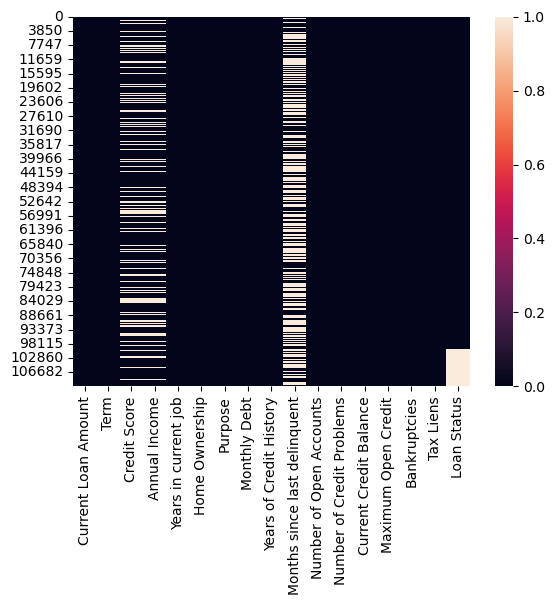

In [22]:
sns.heatmap(df.isnull())

### credit score

<Axes: xlabel='Credit Score', ylabel='Density'>

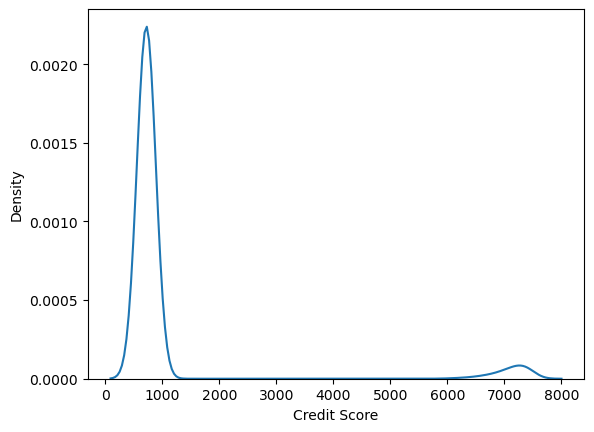

In [23]:
sns.kdeplot(x=df['Credit Score'])

In [24]:
df['Credit Score'].describe()

count    75148.000000
mean      1120.907715
std       1553.618600
min        585.000000
25%        708.000000
50%        728.000000
75%        742.000000
max       7510.000000
Name: Credit Score, dtype: float64

<Axes: xlabel='Credit Score'>

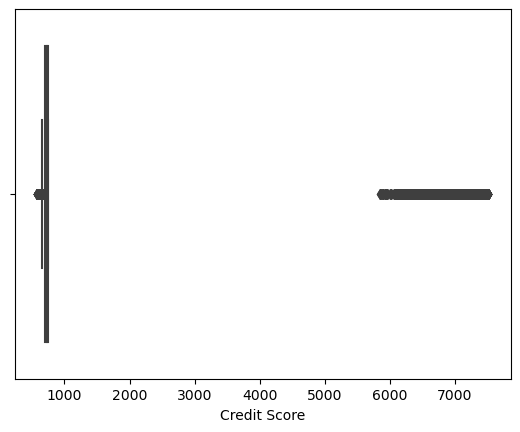

In [25]:
sns.boxplot(x=df['Credit Score'])

In [26]:
df1=df.copy()

In [27]:
#fiiling the null data with credit score range in the data
fill_list = range(585,7510)
df1['Credit Score'] = df1['Credit Score'].fillna(pd.Series(np.random.choice(fill_list , size = len(df1.index))))

In [28]:
fill_list = range(585,7510)
df1['Credit Score'] = df1['Credit Score'].fillna(pd.Series(np.random.choice(fill_list , size = len(df1.index))))

<Axes: xlabel='Credit Score', ylabel='Density'>

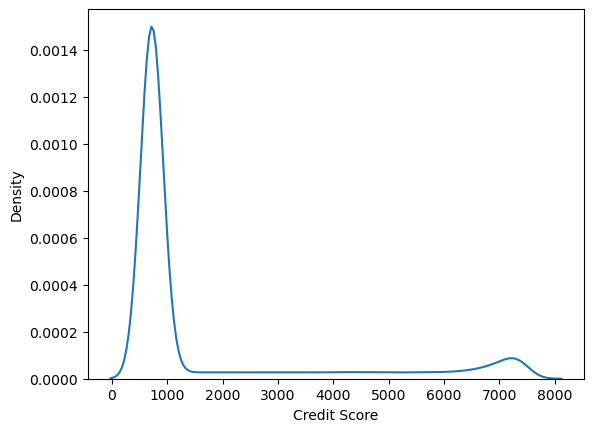

In [29]:
sns.kdeplot(x=df1['Credit Score'])

<Axes: >

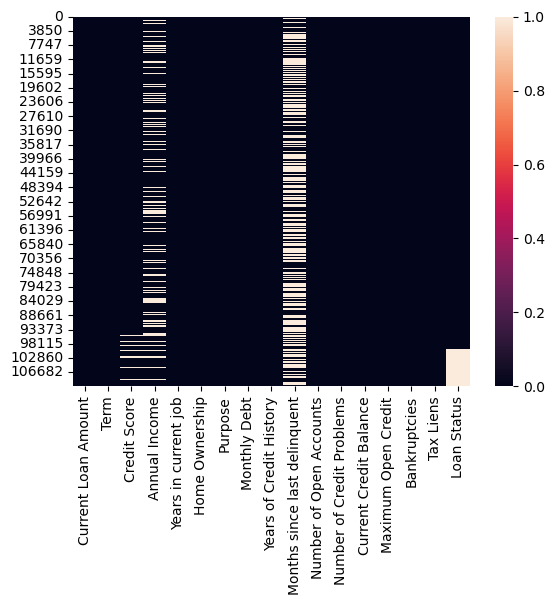

In [30]:
sns.heatmap(df1.isnull())

In [31]:
df1.isnull().sum()

Current Loan Amount                 0
Term                                0
Credit Score                     2771
Annual Income                   20194
Years in current job                0
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    51364
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                        0
Tax Liens                           0
Loan Status                      9551
dtype: int64

### annual income

<Axes: xlabel='Annual Income', ylabel='Density'>

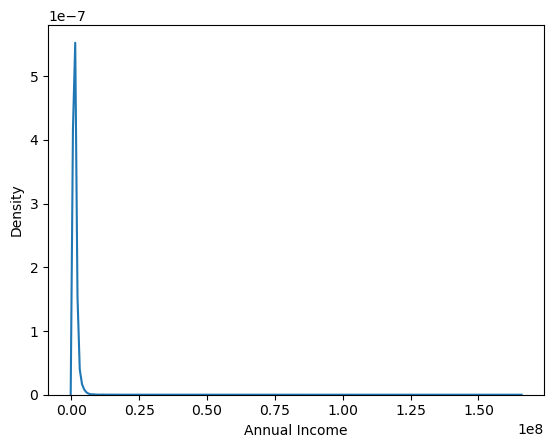

In [32]:
sns.kdeplot(x=df['Annual Income'])

<Axes: xlabel='Annual Income', ylabel='Density'>

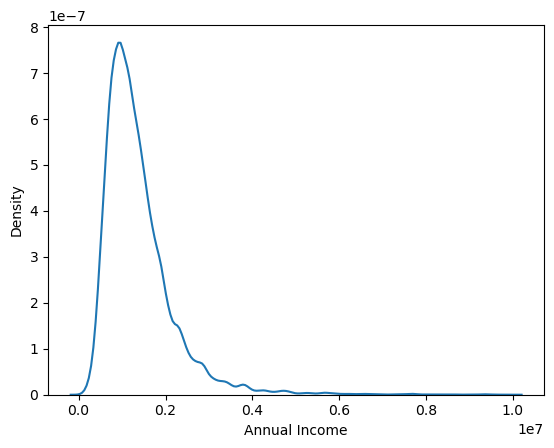

In [33]:
x=df[df['Annual Income']<0.1e+8]
sns.kdeplot(x=x['Annual Income'])

In [34]:
df1['Annual Income']=df1['Annual Income'].interpolate()

<Axes: xlabel='Annual Income', ylabel='Density'>

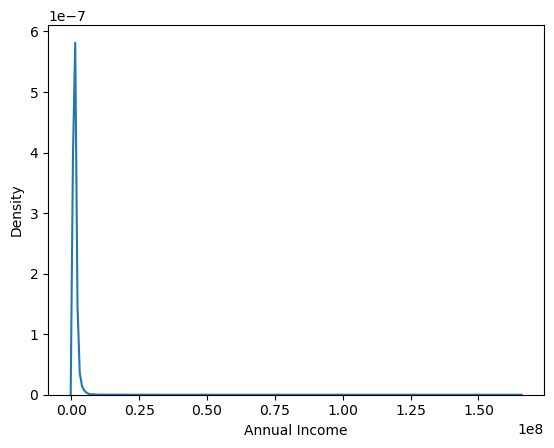

In [35]:
sns.kdeplot(x=df1['Annual Income'])

<Axes: xlabel='Annual Income', ylabel='Density'>

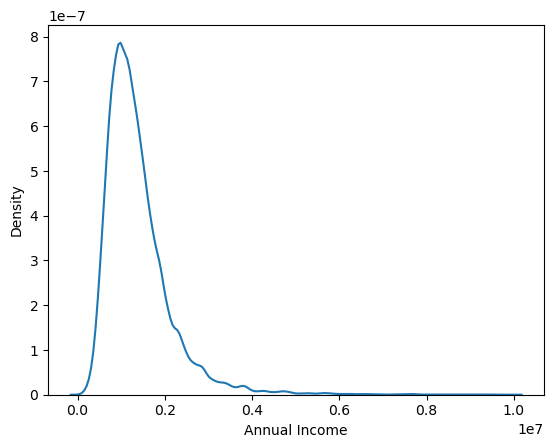

In [36]:
x=df1[df1['Annual Income']<0.1e+8]
sns.kdeplot(x=x['Annual Income'])
# it has the same distribution as the original so it can be accepted to be filled 

<Axes: >

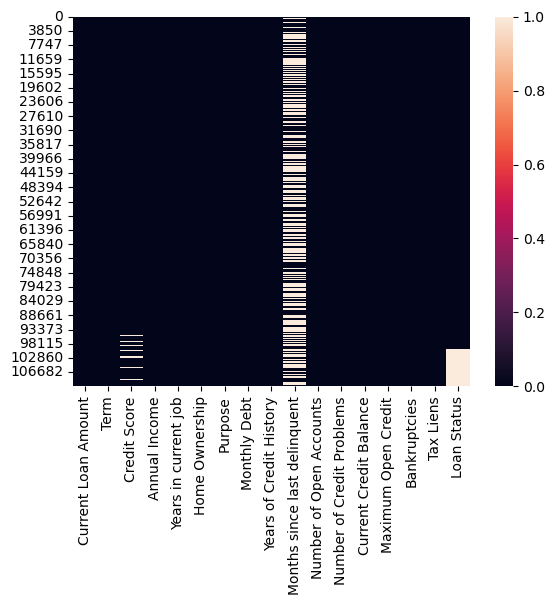

In [37]:
sns.heatmap(df1.isnull())

In [38]:
df.columns

Index(['Current Loan Amount', 'Term', 'Credit Score', 'Annual Income',
       'Years in current job', 'Home Ownership', 'Purpose', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens', 'Loan Status'],
      dtype='object')

### Months since last delinquent

In [39]:
#since there is so many missing values in minths since last delinquent, the feature should be dropped
df1.drop(['Months since last delinquent'],axis=1,inplace=True)

<Axes: >

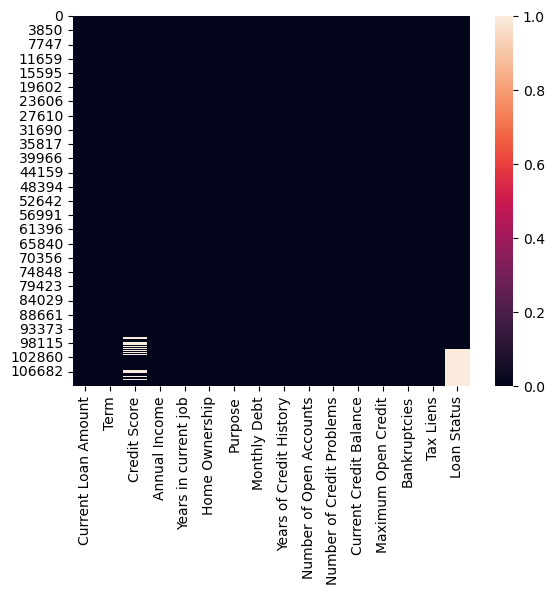

In [40]:
sns.heatmap(df1.isnull())

### loan status

<Axes: ylabel='Loan Status'>

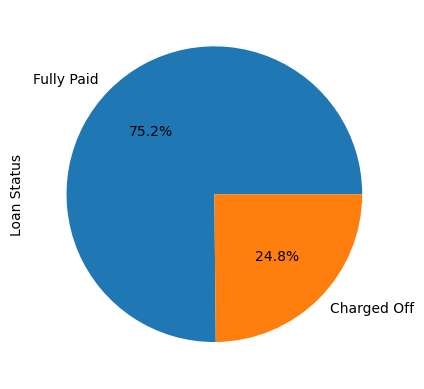

In [41]:
round(df1['Loan Status'].value_counts()/df.shape[0]*100,2).plot.pie(autopct = "%1.1f%%")

In [42]:
df1['Loan Status']=df1['Loan Status'].fillna(method='pad')

<Axes: ylabel='Loan Status'>

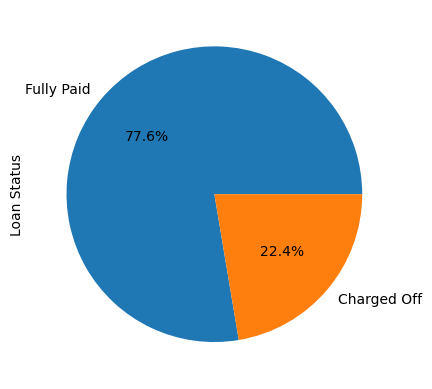

In [43]:
round(df1['Loan Status'].value_counts()/df.shape[0]*100,2).plot.pie(autopct = "%1.1f%%")

<Axes: >

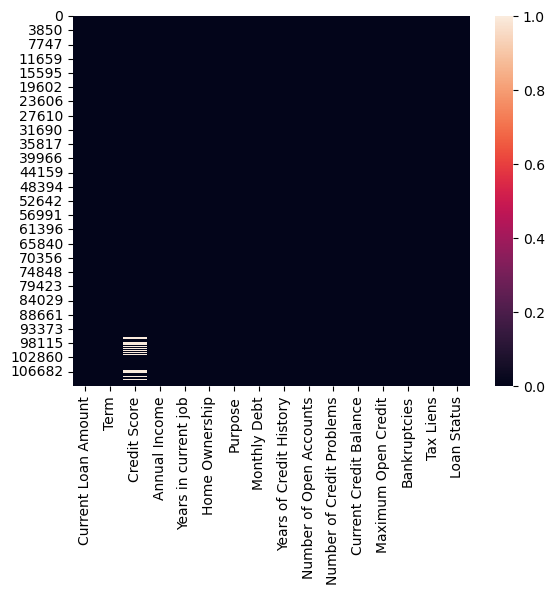

In [44]:
sns.heatmap(df1.isnull())

In [45]:
df1=df1.dropna()

In [46]:
df1.isnull().sum()

Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
Loan Status                  0
dtype: int64

## outliers

Current Loan Amount             Axes(0.125,0.786098;0.168478x0.0939024)
Credit Score                 Axes(0.327174,0.786098;0.168478x0.0939024)
Annual Income                Axes(0.529348,0.786098;0.168478x0.0939024)
Monthly Debt                 Axes(0.731522,0.786098;0.168478x0.0939024)
Years of Credit History         Axes(0.125,0.673415;0.168478x0.0939024)
Number of Open Accounts      Axes(0.327174,0.673415;0.168478x0.0939024)
Number of Credit Problems    Axes(0.529348,0.673415;0.168478x0.0939024)
Current Credit Balance       Axes(0.731522,0.673415;0.168478x0.0939024)
Maximum Open Credit             Axes(0.125,0.560732;0.168478x0.0939024)
Bankruptcies                 Axes(0.327174,0.560732;0.168478x0.0939024)
Tax Liens                    Axes(0.529348,0.560732;0.168478x0.0939024)
dtype: object

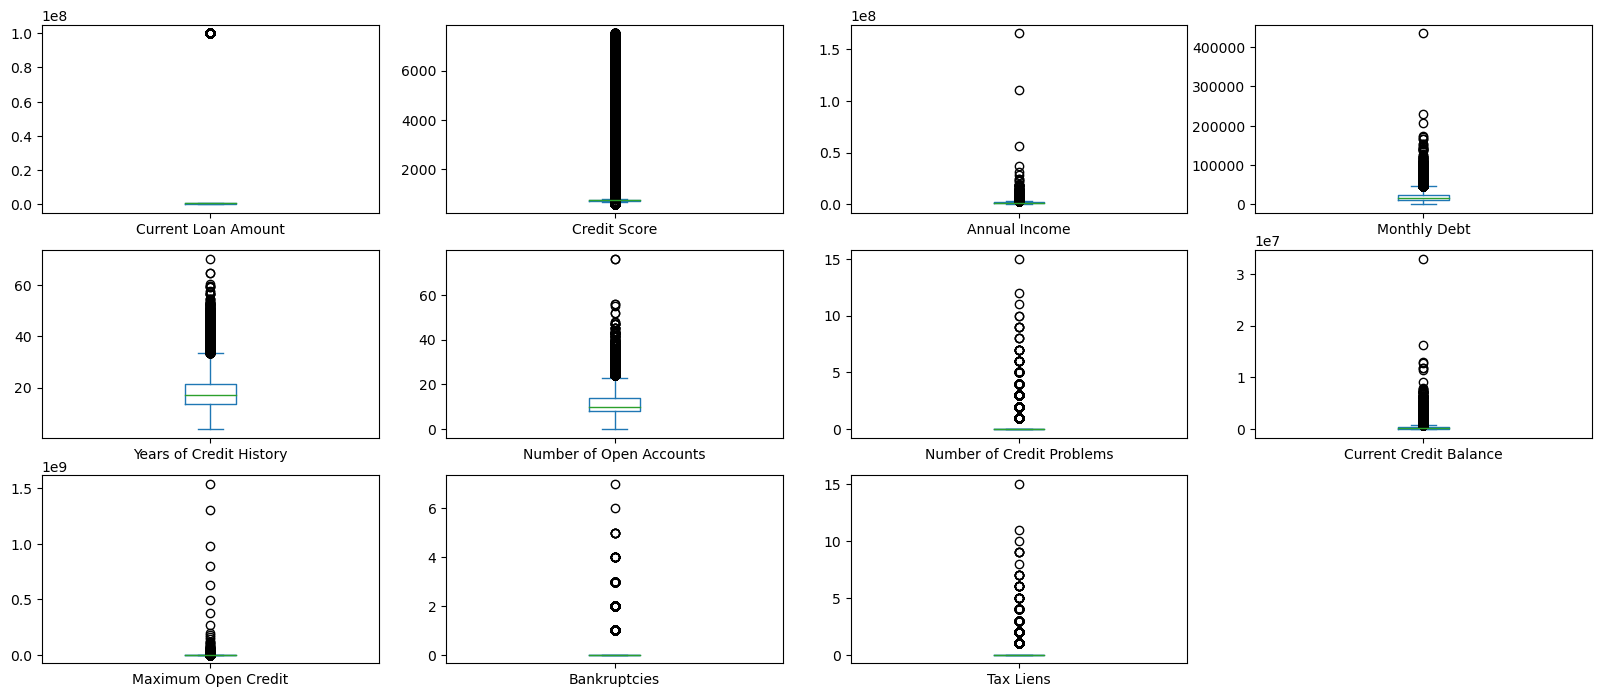

In [47]:
df1.plot(kind = "box" , subplots = True , figsize = (20,20) , layout = (7,4))

### current loan amount

<Axes: xlabel='Current Loan Amount'>

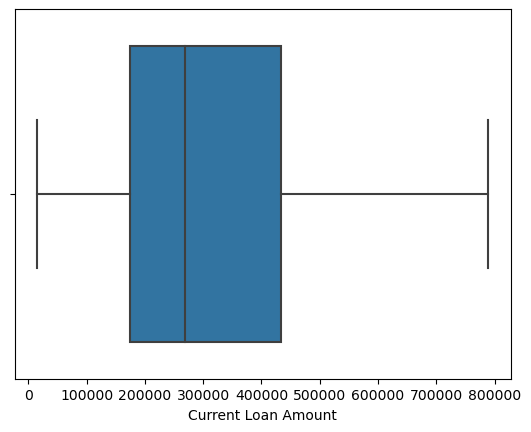

In [48]:
x=df1[df1['Current Loan Amount']<0.9e+8]
sns.boxplot(x=x['Current Loan Amount'])

In [50]:
df1[df1['Current Loan Amount']>=0.9e+8].shape[0]/df1.shape[0]
#won't drop the outliers since it reprsents great percentage of the dat

0.13084011191409836

### Annual income

In [51]:
(df1[df1['Annual Income']>=1e+7].shape[0]/df1.shape[0])*100

0.08101889360598892

<Axes: xlabel='Annual Income'>

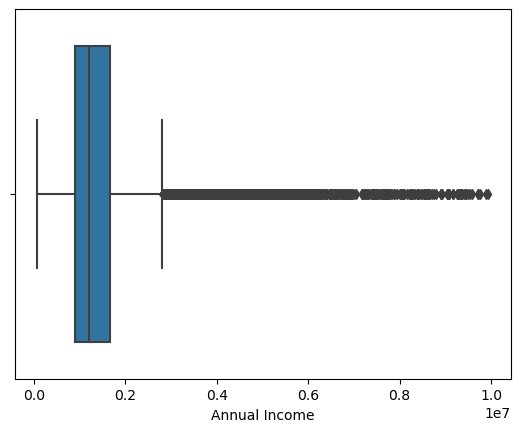

In [52]:
x=df1[df1['Annual Income']<1e+7]
sns.boxplot(x=x['Annual Income'])

In [53]:
df1=df1[df1['Annual Income']<1e+7]

### monthly debt

In [54]:
(df1[df1['Monthly Debt']>=100000].shape[0]/df1.shape[0])*100

0.05729977512541083

<Axes: xlabel='Monthly Debt'>

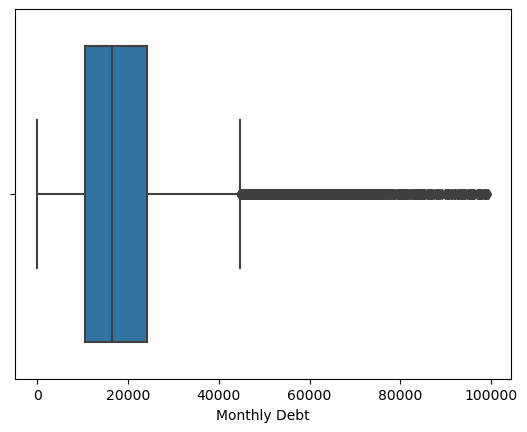

In [55]:
x=df1[df1['Monthly Debt']<100000]
sns.boxplot(x=x['Monthly Debt'])

In [56]:
df1=df1[df1['Monthly Debt']<100000]

### years of credit history

In [57]:
(df1[df1['Years of Credit History']>=50].shape[0]/df1.shape[0])*100

0.06274136494921194

<Axes: xlabel='Years of Credit History'>

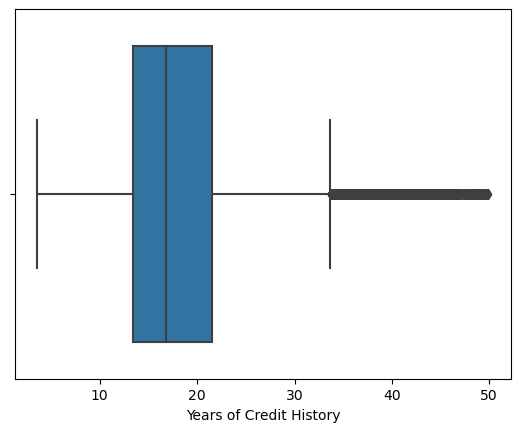

In [58]:
x=df1[df1['Years of Credit History']<50]
sns.boxplot(x=x['Years of Credit History'])

In [59]:
df1=df1[df1['Years of Credit History']<50]

### number of open accounts

In [60]:
(df1[df1['Number of Open Accounts']>=42].shape[0]/df1.shape[0])*100

0.04004979163284083

<Axes: xlabel='Number of Open Accounts'>

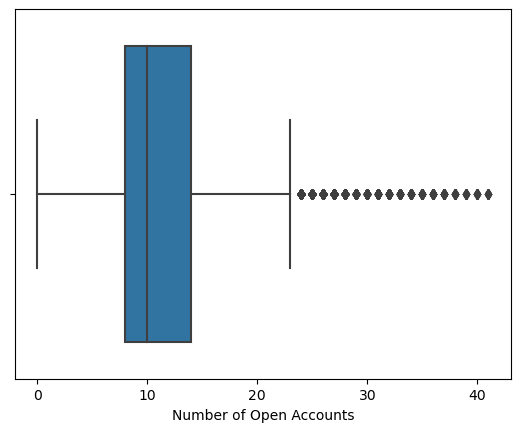

In [61]:
x=df1[df1['Number of Open Accounts']<42]
sns.boxplot(x=x['Number of Open Accounts'])

In [62]:
df1=df1[df1['Number of Open Accounts']<42]

### number of credit problems

<Axes: xlabel='Number of Credit Problems'>

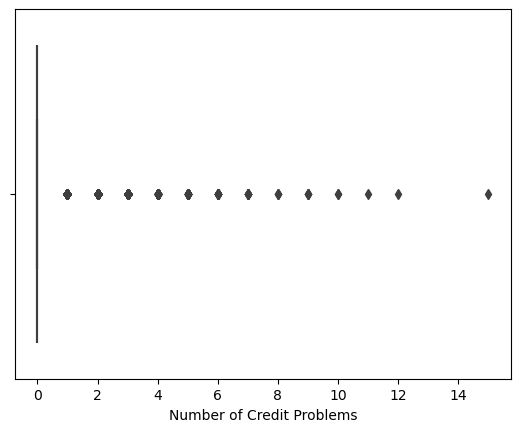

In [63]:
x=df1['Number of Credit Problems']
sns.boxplot(x=x)

In [64]:
df1 = df1[df1['Number of Credit Problems']<14]

### current credit balance

<Axes: xlabel='Current Credit Balance'>

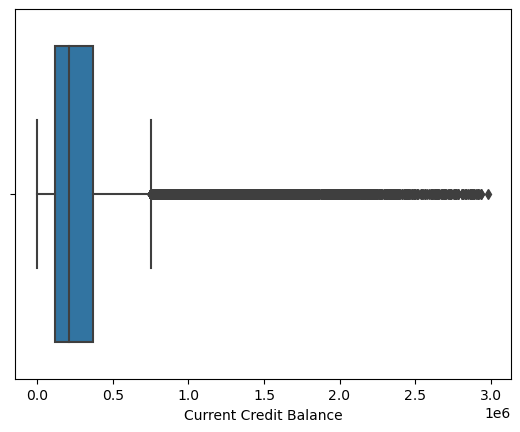

In [65]:
x=df1[df1['Current Credit Balance']<0.3e+7]
sns.boxplot(x=x['Current Credit Balance'])

In [66]:
df1=df1[df1['Current Credit Balance']<0.3e+7]

### maximum open credit

<Axes: xlabel='Maximum Open Credit'>

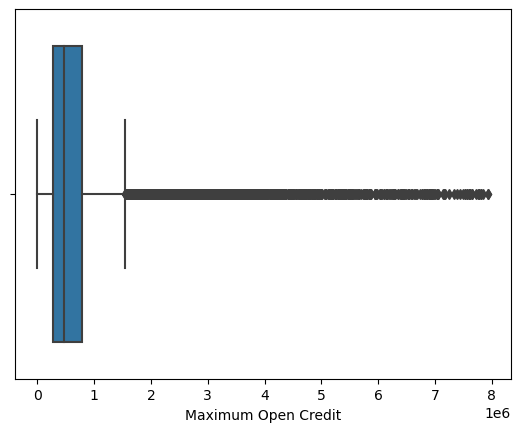

In [67]:
x=df1[df1['Maximum Open Credit']<0.8e+7]
sns.boxplot(x=x['Maximum Open Credit'])

In [68]:
df1=df1[df1['Maximum Open Credit']<0.8e+7]

## encoding

In [69]:
df1

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status
0,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0,Fully Paid
1,262328.0,Short Term,6310.0,1699692.5,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0,Fully Paid
2,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0,Fully Paid
3,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0,Fully Paid
4,176220.0,Short Term,6291.0,851903.0,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110508,442596.0,Short Term,739.0,1528968.0,7 years,Home Mortgage,Debt Consolidation,19494.38,16.7,11.0,0.0,419235.0,656876.0,0.0,0.0,Fully Paid
110509,157806.0,Short Term,731.0,1514376.0,6 years,Rent,Debt Consolidation,4795.41,12.5,9.0,0.0,87058.0,234410.0,0.0,0.0,Fully Paid
110510,132550.0,Short Term,718.0,763192.0,4 years,Home Mortgage,Debt Consolidation,12401.87,9.9,8.0,0.0,74309.0,329692.0,0.0,0.0,Fully Paid
110512,99999999.0,Short Term,721.0,972097.0,10+ years,Home Mortgage,Debt Consolidation,12232.20,16.8,8.0,1.0,184984.0,240658.0,0.0,0.0,Fully Paid


### Years in Current Job

In [70]:
df1['Years in current job']=df1['Years in current job'].str.replace('years','')

In [71]:
df1['Years in current job'].value_counts()

10+         29667
2            8817
3            7913
< 1 year     7848
5            6569
1 year       6220
4            5904
6            5478
7            5330
8            4431
9            3784
Name: Years in current job, dtype: int64

In [72]:
df1['Years in current job']=df1['Years in current job'].str.replace('year','')

In [73]:
df1['Years in current job'].value_counts()

10+     29667
2        8817
3        7913
< 1      7848
5        6569
1        6220
4        5904
6        5478
7        5330
8        4431
9        3784
Name: Years in current job, dtype: int64

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95342 entries, 0 to 110513
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Current Loan Amount           95342 non-null  float64
 1   Term                          95342 non-null  object 
 2   Credit Score                  75148 non-null  float64
 3   Annual Income                 75148 non-null  float64
 4   Years in current job          95342 non-null  object 
 5   Home Ownership                95342 non-null  object 
 6   Purpose                       95342 non-null  object 
 7   Monthly Debt                  95342 non-null  float64
 8   Years of Credit History       95342 non-null  float64
 9   Months since last delinquent  43978 non-null  float64
 10  Number of Open Accounts       95342 non-null  float64
 11  Number of Credit Problems     95342 non-null  float64
 12  Current Credit Balance        95342 non-null  float64
 13  

In [75]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols = ['Loan Status', 'Term', 'Years in current job',
       'Home Ownership', 'Purpose']
df1[cols] = df1[cols].apply(LabelEncoder().fit_transform)
df1.head()

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status
0,445412.0,1,709.0,1167493.0,8,1,5,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0,1
1,262328.0,1,6310.0,1699692.5,1,1,3,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0,1
2,99999999.0,1,741.0,2231892.0,8,2,3,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0,1
3,347666.0,0,721.0,806949.0,3,2,3,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0,1
4,176220.0,1,6291.0,851903.0,5,3,3,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0,1


In [76]:
df1['Tax Liens'].value_counts()

0.0     90291
1.0      1161
2.0       318
3.0       102
4.0        51
5.0        15
6.0        10
7.0         6
9.0         4
11.0        1
10.0        1
8.0         1
Name: Tax Liens, dtype: int64

## train test split

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
x=df1.drop(['Tax Liens'],axis=1)
y=df1['Tax Liens']

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42, test_size=0.25)

## scaling

In [82]:
from sklearn.preprocessing import RobustScaler

In [83]:
rob = RobustScaler()

In [84]:
x_train_scaled = rob.fit_transform(x_train)

In [85]:
x_test_scaled = rob.fit_transform(x_test)

### checking multicollinearity

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [87]:
X = df1.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,Current Loan Amount,1.195143
1,Term,3.497078
2,Credit Score,1.704854
3,Annual Income,5.488198
4,Years in current job,2.298561
5,Home Ownership,4.254642
6,Purpose,3.499290
7,Monthly Debt,6.680771
8,Years of Credit History,7.184073
9,Number of Open Accounts,7.203093


# Modelling

## Logistic regression

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
log_reg=LogisticRegression(C=100, max_iter=1000, penalty='l1', solver='liblinear' )
log_reg.fit(x_train_scaled,y_train)
print(log_reg.score(x_train_scaled,y_train))
print(log_reg.score(x_test_scaled,y_test))

0.9806292590981586
0.9794267321995563


In [90]:
log_reg2=LogisticRegression(C=0.1, max_iter=1000, penalty='l1', solver='liblinear' )
log_reg2.fit(x_train_scaled,y_train)
print(log_reg2.score(x_train_scaled,y_train))
print(log_reg2.score(x_test_scaled,y_test))
#c doesn't affect the score that much

0.9806147600405973
0.9795572180418425


In [91]:
log_reg2.predict(x_test_scaled)

array([0., 0., 0., ..., 0., 0., 0.])

In [92]:
log_reg3=LogisticRegression(max_iter=2000, penalty='l1', solver='saga' )
log_reg3.fit(x_train_scaled,y_train)
print(log_reg3.score(x_train_scaled,y_train))
print(log_reg3.score(x_test_scaled,y_test))

0.9809772364796289
0.9796442086033665


In [93]:
log_reg3=LogisticRegression(max_iter=2000, penalty='l2', solver='newton-cg' )
log_reg3.fit(x_train_scaled,y_train)
print(log_reg3.score(x_train_scaled,y_train))
print(log_reg3.score(x_test_scaled,y_test))

0.982108162969407
0.980166151972511


## KNN

In [95]:
from sklearn.neighbors import KNeighborsClassifier

In [96]:
train_accuracy=[]
test_accuracy=[]
for i in range(1,14):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train_scaled,y_train)
  train_accuracy.append(knn.score(x_train_scaled,y_train))
  test_accuracy.append(knn.score(x_test_scaled,y_test))

In [97]:
pd.DataFrame({"train_accuracy" : train_accuracy , "test_accuracy": test_accuracy})
#K=3 is the best model

,train_accuracy,test_accuracy
0,1.000000,0.980645
1,0.986385,0.981645
2,0.986429,0.981428
3,0.984196,0.981341
4,0.983747,0.981080
5,0.983196,0.980906
6,0.983109,0.980906
7,0.982891,0.981123
8,0.982790,0.981036
9,0.982717,0.980949


## SVM

In [98]:
from sklearn.svm import SVC

In [99]:
svm_l= SVC(kernel='linear')
svm_l.fit(x_train_scaled,y_train)

SVC(kernel='linear')

In [105]:
print(svm_l.score(x_train_scaled,y_train))
print(svm_l.score(x_test_scaled,y_test))

0.9849209801362911
0.9831238310643295


In [106]:
svm_rbf= SVC()
svm_rbf.fit(x_train_scaled,y_train)
print(svm_rbf.score(x_train_scaled,y_train))
print(svm_rbf.score(x_test_scaled,y_test))

0.9820646657967232
0.9811665434300378


In [107]:
svm_pol= SVC(kernel='poly')
svm_pol.fit(x_train_scaled,y_train)
print(svm_pol.score(x_train_scaled,y_train))
print(svm_pol.score(x_test_scaled,y_test))

0.9820646657967232
0.9811665434300378


## Naive Bayes

In [131]:
from sklearn.naive_bayes import GaussianNB

In [132]:
gnb = GaussianNB()

In [133]:
gnb.fit(x_train_scaled, y_train)

GaussianNB()

In [134]:
gnb.score(x_train_scaled, y_train)

0.9653472524285921

In [135]:
gnb.score(x_test_scaled, y_test)

0.9637249358444608

In [136]:
# since all values must be postive i'll rescale it using minmax scalar

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [138]:
x_train_edit=scaler.fit_transform(x_train)
x_test_edit=scaler.fit_transform(x_test)

In [ ]:
### multinomail

In [139]:
from sklearn.naive_bayes import MultinomialNB

In [144]:
multi = MultinomialNB(force_alpha=True)

In [147]:
multi.fit(x_train_edit,y_train)

MultinomialNB(force_alpha=True)

In [148]:
multi.score(x_train_edit,y_train)

0.9820646657967232

In [149]:
multi.score(x_test_edit,y_test)

0.9811665434300378

The best model is the knn model 